In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

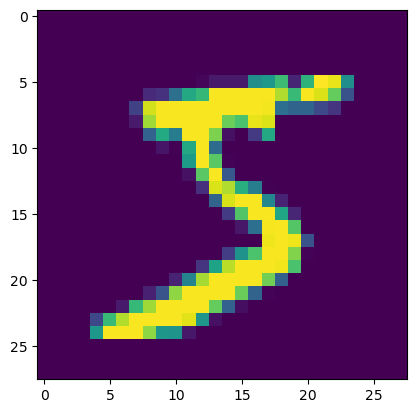

In [5]:
plt.imshow(x_train[0])

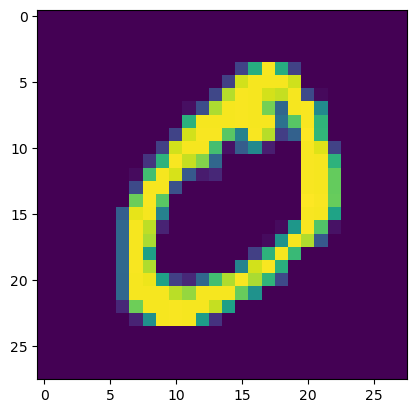

In [6]:
plt.imshow(x_train[1])

In [7]:
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

C:\Users\Praveen Kumar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [17]:
this=model.fit(x_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8494 - loss: 0.4752 - val_accuracy: 0.9719 - val_loss: 0.0903
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9753 - loss: 0.0822 - val_accuracy: 0.9804 - val_loss: 0.0615
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9822 - loss: 0.0553 - val_accuracy: 0.9847 - val_loss: 0.0494
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9849 - loss: 0.0480 - val_accuracy: 0.9851 - val_loss: 0.0480
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9862 - loss: 0.0429 - val_accuracy: 0.9863 - val_loss: 0.0487
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9902 - loss: 0.0326 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9911 - loss: 0.0276 -

In [18]:
predictions=model.predict(x_test)
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
predictions.shape

(10000, 10)

In [20]:
print(predictions)

[[3.1949576e-10 3.1965829e-11 2.0043389e-07 ... 9.9999774e-01
  8.5510787e-10 9.3208070e-07]
 [1.0787414e-05 2.2096332e-05 9.9996519e-01 ... 1.1408642e-11
  9.9812084e-08 1.5079577e-12]
 [8.7871641e-08 9.9973494e-01 1.3485688e-07 ... 7.4525953e-05
  1.2627139e-05 2.6752869e-07]
 ...
 [2.6584442e-15 4.0456336e-11 2.0650438e-14 ... 3.8054284e-09
  1.0590184e-07 1.9337108e-07]
 [7.6324241e-08 1.0827994e-15 3.8333952e-13 ... 4.4658623e-14
  1.8926532e-05 3.9831143e-09]
 [2.1188761e-08 9.3853675e-12 6.1945997e-08 ... 7.7495757e-13
  1.4623621e-05 1.3010026e-11]]


In [21]:
import tensorflow as tf


Predicted shape: (10000,)


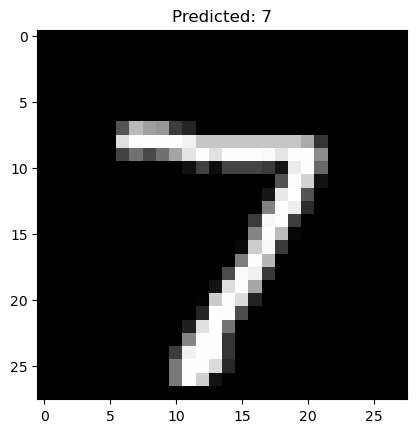

In [23]:
y = np.argmax(predictions, axis=1)  # Get class with highest probability
print("Predicted shape:", y.shape)

# Plot an example
plt.title(f"Predicted: {y[0]}")
plt.imshow(x_test[0].squeeze(), cmap='gray')  # Use squeeze to remove channel dimension
plt.show()

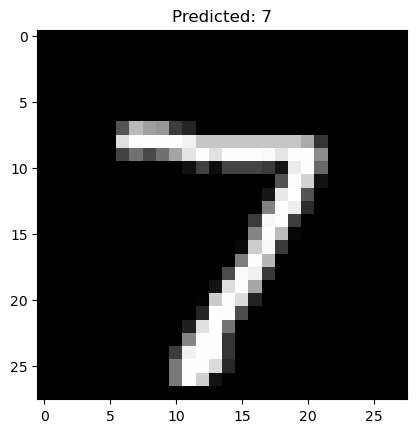

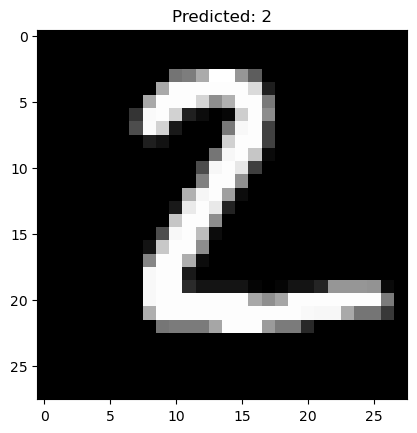

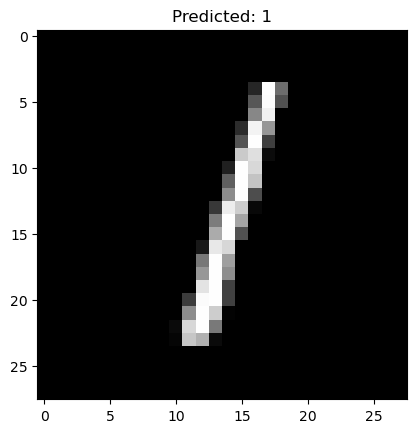

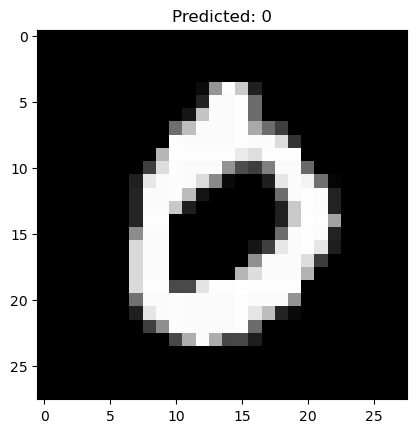

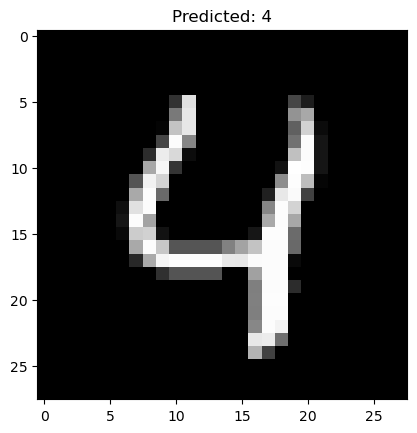

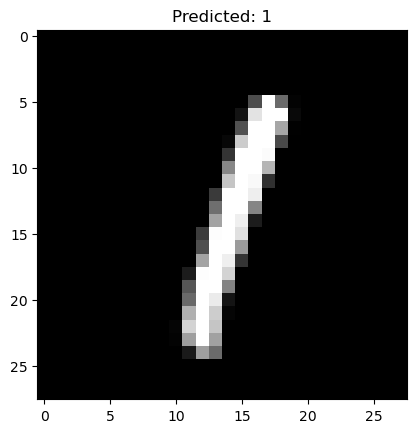

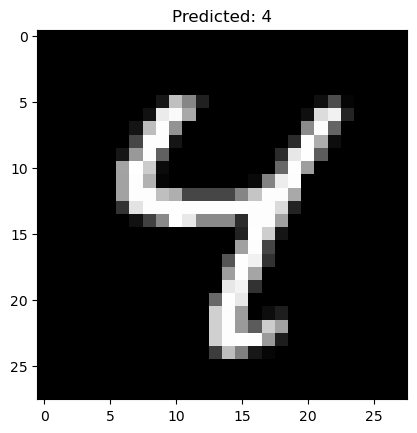

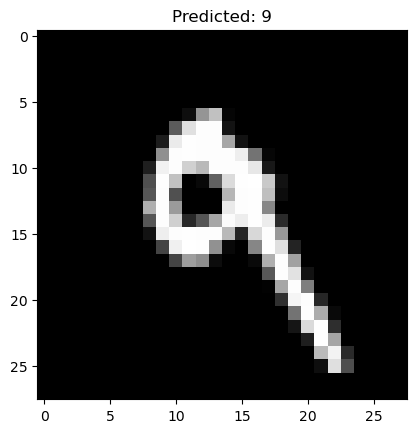

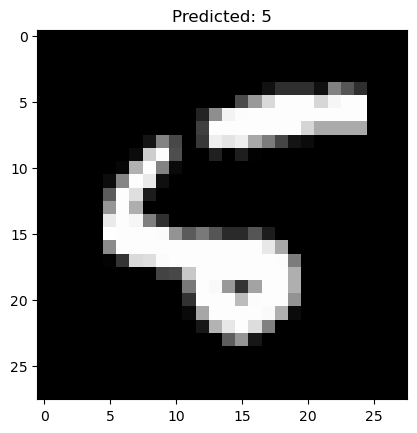

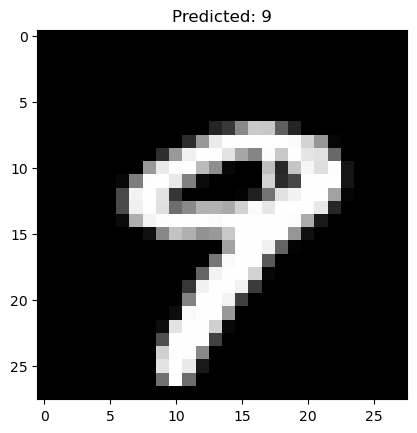

In [24]:
for i in range (10):
    plt.title(f"Predicted: {y[i]}")
    plt.imshow(x_test[i].squeeze(),cmap='grey')
    plt.show()